# Analisis Data COVID-19 di 10 Negara ASEAN

Covid-19 merupakan pandemi yang sudah mewabah ke seluruh dunia hingga saat ini dan belum bisa diprediksi kapan pandemi ini akan berakhir. Sebagian besar negara-negara di dunia sudah terjangkit, termasuk 10 negara ASEAN yaitu:
* Indonesia (ID)
* Malaysia (MY) 
* Singapore (SG)
* Thailand (TH)
* Viet Nam (VN)
* Philippines (PH)
* Brunei Darussalam (BN)
* Lao People's Democratic Republic (LA)
* Myanmar (MM)
* Cambodia (KH)

Penanganan tiap-tiap negara pun berbeda, sesuai dengan kebijakan pemerintah. Hal ini mengakibatkan perbedaan trend kenaikan atau penurunan kasus covid berbeda-beda tiap negara.

Pada kasus kali ini, kita akan mencoba menggali data covid-19 dari salah satu open API yang tersedia yaitu https://covid19-api.org/.

In [1]:
# Import library yang digunakan
import json
import numpy as np
import pandas as pd
import requests
import datetime
import matplotlib.pyplot as plt

In [2]:
# Membuat Fungsi GET API
def get_json(api_url):
	response = requests.get(api_url)
	if response.status_code == 200:
		return json.loads(response.content.decode('utf-8'))
	else:
		return None

In [3]:
countries = ['ID','MY','SG','TH','VN','PH','BN','LA','MM','KH'] # 10 Negara ASEAN 
i = 0
for country in countries:
	asean_url = 'https://covid19-api.org/api/status/'+country # Memanggil fungsi API COVID-19 di ASEAN
	df_asean = pd.json_normalize(get_json(asean_url))
	df_asean['last_update'] = pd.to_datetime(df_asean['last_update'], format='%Y-%m-%dT%H:%M:%S') # merubah string ke bentuk datetime
	df_asean['last_update'] = df_asean['last_update'].apply(lambda x: x.date()) # Merubah format date
	if i==0:
		df_asean_merged = df_asean
	else:
		df_asean_merged = df_asean.append(df_asean_merged, ignore_index=True)
	i=i+1


print(df_asean_merged)

  country last_update   cases  deaths  recovered
0      KH  2020-09-16     275       0        274
1      MM  2020-09-16    3502      35        832
2      LA  2020-09-16      23       0         22
3      BN  2020-09-16     145       3        139
4      PH  2020-09-16  269407    4663     207352
5      VN  2020-09-16    1063      35        926
6      TH  2020-09-16    3480      58       3315
7      SG  2020-09-16   57488      27      56884
8      MY  2020-09-16    9969     128       9209
9      ID  2020-09-16  225030    8965     161065


In [4]:
countries_url = 'https://covid19-api.org/api/countries' # mengambil variable countries_url ke api covid19-api.org
df_countries = pd.json_normalize(get_json(countries_url))
df_countries = df_countries.rename(columns={'alpha2': 'country'})[['name','country']] # Merubah kolom alpha2 menjadi country kemudian ambil name dan country

In [5]:
# Menggabungkan df_asean_merged dan df_countries 
df_covid_asean = pd.merge(df_asean_merged, df_countries, on='country')
print(df_covid_asean)

  country last_update   cases  deaths  recovered  \
0      KH  2020-09-16     275       0        274   
1      MM  2020-09-16    3502      35        832   
2      LA  2020-09-16      23       0         22   
3      BN  2020-09-16     145       3        139   
4      PH  2020-09-16  269407    4663     207352   
5      VN  2020-09-16    1063      35        926   
6      TH  2020-09-16    3480      58       3315   
7      SG  2020-09-16   57488      27      56884   
8      MY  2020-09-16    9969     128       9209   
9      ID  2020-09-16  225030    8965     161065   

                               name  
0                          Cambodia  
1                           Myanmar  
2  Lao People's Democratic Republic  
3                 Brunei Darussalam  
4                       Philippines  
5                          Viet Nam  
6                          Thailand  
7                         Singapore  
8                          Malaysia  
9                         Indonesia  


In [6]:
df_cases = df_covid_asean.sort_values(by='cases', ascending=False)
print(df_cases)

  country last_update   cases  deaths  recovered  \
4      PH  2020-09-16  269407    4663     207352   
9      ID  2020-09-16  225030    8965     161065   
7      SG  2020-09-16   57488      27      56884   
8      MY  2020-09-16    9969     128       9209   
1      MM  2020-09-16    3502      35        832   
6      TH  2020-09-16    3480      58       3315   
5      VN  2020-09-16    1063      35        926   
0      KH  2020-09-16     275       0        274   
3      BN  2020-09-16     145       3        139   
2      LA  2020-09-16      23       0         22   

                               name  
4                       Philippines  
9                         Indonesia  
7                         Singapore  
8                          Malaysia  
1                           Myanmar  
6                          Thailand  
5                          Viet Nam  
0                          Cambodia  
3                 Brunei Darussalam  
2  Lao People's Democratic Republic  


In [7]:
# Menambahkan kolom fatality ratio
df_covid_asean['fatality_ratio'] = df_covid_asean['deaths'] / df_covid_asean['cases'] * 100

In [8]:
# Mengurutkan negara dengan fatality ratio tertinggi
df_fatality_rate = df_covid_asean.sort_values(by='fatality_ratio', ascending=False)
print(df_fatality_rate)

  country last_update   cases  deaths  recovered  \
9      ID  2020-09-16  225030    8965     161065   
5      VN  2020-09-16    1063      35        926   
3      BN  2020-09-16     145       3        139   
4      PH  2020-09-16  269407    4663     207352   
6      TH  2020-09-16    3480      58       3315   
8      MY  2020-09-16    9969     128       9209   
1      MM  2020-09-16    3502      35        832   
7      SG  2020-09-16   57488      27      56884   
0      KH  2020-09-16     275       0        274   
2      LA  2020-09-16      23       0         22   

                               name  fatality_ratio  
9                         Indonesia        3.983913  
5                          Viet Nam        3.292568  
3                 Brunei Darussalam        2.068966  
4                       Philippines        1.730838  
6                          Thailand        1.666667  
8                          Malaysia        1.283980  
1                           Myanmar        0.9994

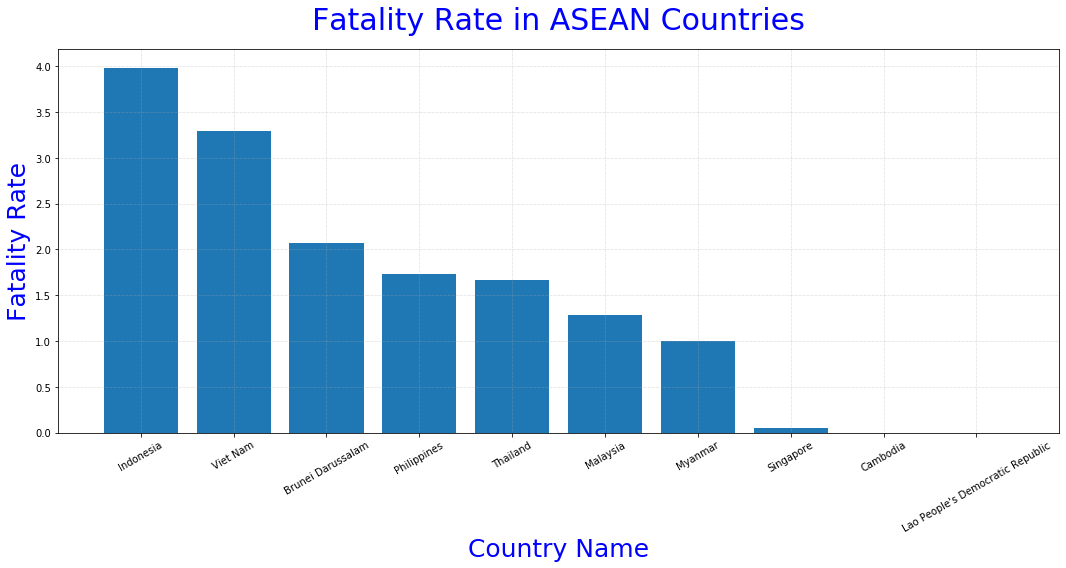

In [9]:
# Visualisasi negara ASEAN dengan fatality ratio tertinggi
plt.figure(figsize=(15, 8))
x = df_fatality_rate['name']
y = df_fatality_rate['fatality_ratio']
plt.bar(x,y)
plt.xlabel('Country Name', fontsize=25, color='blue')
plt.ylabel('Fatality Rate', fontsize=25, color='blue')
plt.title('Fatality Rate in ASEAN Countries', fontsize=30, pad=20, color='blue')
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

In [10]:
# COVID-19 di ASEAN
countries = ['ID','MY','SG','TH','VN','PH','BN','LA','MM','KH']
i = 0
for country in countries:
	covid_timeline_url = 'https://covid19-api.org/api/timeline/'+country
	df_covid_timeline = pd.json_normalize(get_json(covid_timeline_url))
	df_covid_timeline['last_update'] = pd.to_datetime(df_covid_timeline['last_update'], format='%Y-%m-%dT%H:%M:%S')
	df_covid_timeline['last_update'] = df_covid_timeline['last_update'].apply(lambda x: x.date())
	if i==0:
		df_covid_timeline_merged = df_covid_timeline
	else:
		df_covid_timeline_merged = df_covid_timeline.append(df_covid_timeline_merged, ignore_index=True)
	i=i+1
    
print(df_covid_timeline_merged.head())

  country last_update  cases  deaths  recovered
0      KH  2020-09-16    275       0        274
1      KH  2020-09-15    275       0        274
2      KH  2020-09-14    275       0        274
3      KH  2020-09-13    275       0        274
4      KH  2020-09-12    274       0        274


In [11]:
# Menggabungkan df_covid_timeline_merged dan df_countries
df_covid_timeline_denormalized = pd.merge(df_covid_timeline_merged, df_countries, on='country')
print(df_covid_timeline_denormalized)

     country last_update  cases  deaths  recovered       name
0         KH  2020-09-16    275       0        274   Cambodia
1         KH  2020-09-15    275       0        274   Cambodia
2         KH  2020-09-14    275       0        274   Cambodia
3         KH  2020-09-13    275       0        274   Cambodia
4         KH  2020-09-12    274       0        274   Cambodia
...      ...         ...    ...     ...        ...        ...
2007      ID  2020-03-10     27       0          2  Indonesia
2008      ID  2020-03-09     19       0          0  Indonesia
2009      ID  2020-03-08      6       0          0  Indonesia
2010      ID  2020-03-06      4       0          0  Indonesia
2011      ID  2020-03-02      2       0          0  Indonesia

[2012 rows x 6 columns]


In [12]:
# Kasus COVID-19 di ASEAN mulai Maret 2020 hingga saat ini
df_covid_timeline_denormalized = df_covid_timeline_denormalized[(df_covid_timeline_denormalized['last_update'] >= datetime.date(2020, 3, 1))]

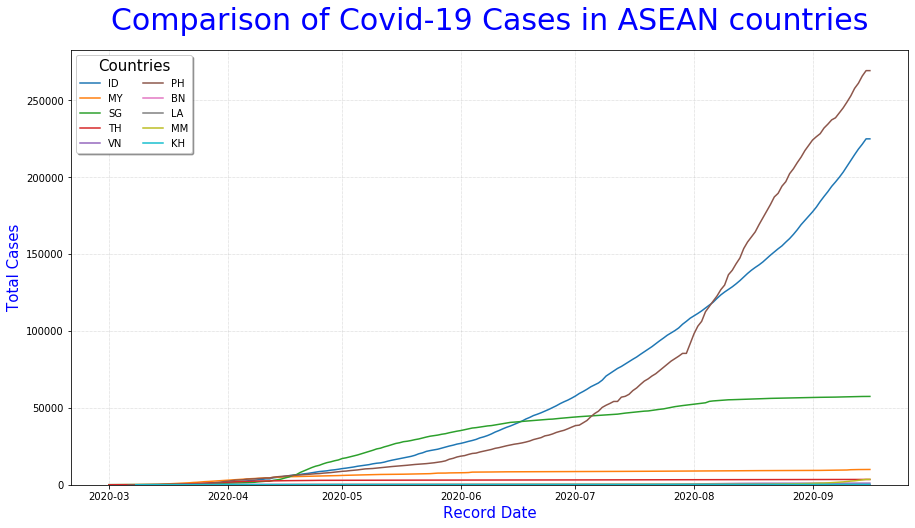

In [13]:
# Visualisasi kasus COVID-19 di negara ASEAN
plt.figure(figsize=(15,8))
plt.clf()
countries = ['ID','MY','SG','TH','VN','PH','BN','LA','MM','KH']
for country in countries:
	country_data = df_covid_timeline_denormalized['country']==country
	x = df_covid_timeline_denormalized[country_data]['last_update']
	y = df_covid_timeline_denormalized[country_data]['cases']
	plt.plot(x, y, label = country)

plt.xlabel('Record Date', fontsize=15, color='blue')
plt.ylabel('Total Cases', fontsize=15, color='blue')
plt.title('Comparison of Covid-19 Cases in ASEAN countries', loc='center', pad=20, fontsize=30, color='blue')
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.legend(loc='upper left', shadow=True, ncol=2, fontsize=10, title='Countries', title_fontsize=15)
plt.ylim(ymin=0)
plt.show()

Berdasarkan data dan grafik diatas, kasus COVID-19 tertinggi di ASEAN adalah Philippines (PH) dimana 269407 kasus. Indonesia (ID) merupakan kasus COVID-19 terburuk dimana persentase meninggal akibat COVID-19 tertinggi di ASEAN yaitu sebanyak 3.98% dan jumlah kasus menduduki urutan ke-2 yaitu sebanyak 225030 kasus. Sedangkan Cambodia (KH) dan Lao People's Democratic Republic (LA) persentase meninggal akibat COVID-19 sebanyak 0%. 